# Chase Termination Analysis: Plotting Experimental Results

This notebook accompanies our paper titled "Semi-Oblivious Chase Termination for Linear Existential Rules: An Experimental Study", VLDB'23, presenting our experimental findings and the reproducibility of our results. Our goal in this demonsteration is to provide a guide that walks you through the steps necessary to replicate our results in the paper. 

**Note**: Ensure you have installed all required libraries, including seaborn, before running the code cells.

In [6]:
import pandas as pd 
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from colour import Color
import warnings
warnings.filterwarnings('ignore')


# %matplotlib notebook
%matplotlib inline
red = Color("red").hex
green = Color("green").hex
blue = Color("blue").hex
black = Color("black").hex
grey = Color("grey").hex
colorch="#00802b"
colorgr="#3366cc"
rlcolor="black"
colorred="#FF0000"
sns.set_theme(style="ticks", palette="colorblind")
sns.set_context("paper")
palette = sns.color_palette("colorblind")
lwi = 0.75
wid = 0.75
thickLine = 1
thinLine = 0
msize = 30
mtsize = 10
c_palette = palette

## Performance Analysis of the IsChaseFinite[SL] Algorithm for Simple-Linear Rules

The plots bellow present the effectiveness of the IsChaseFinite[SL] algorithm in checking termination for simple-linear rules. The results, illustrated in Figure 1 (a)-(d) of our paper, detail the algorithm's runtime against a varying number of rules (n_rules). The analysis breaks down the runtime into total end-to-end execution and its constituents: parsing time (t_parse), dependency graph construction time (t_graph), and cycle detection time through special fully connected components (t_comp). The following code segments load the experimental results from a CSV file, prepare the data, and generate the corresponding plots.

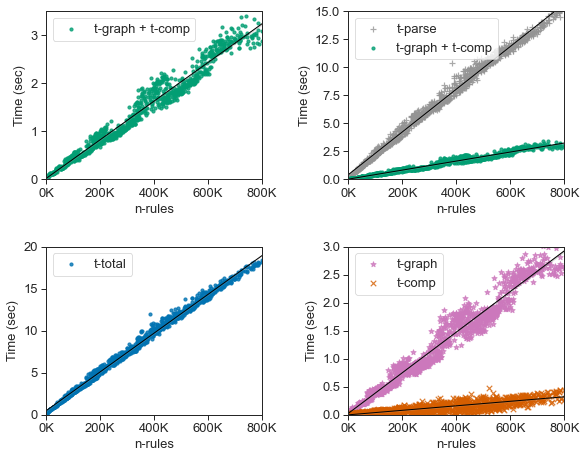

In [7]:
# Loading the csv file containing the results
d = pd.read_csv("simple-linear.csv")

# Preparing the attributes to show in the plots
d['t_graph_component'] = d['t_graph'] + d['t_component']
d['t_graph_component_sec'] = d['t_graph_component'] /1000
d['t_graph_sec'] = d['t_graph'] /1000
d['t_component_sec'] = d['t_component'] /1000
d = d.loc[d["arity_profile"] == "[1-5]"]
d['n_rules_round'] = np.floor(d['n_rule']/100000) * 100000
d['t_parse_sec'] = d['t_parse']/1000
d['t_total_sec'] = d['t_graph_component_sec'] + d['t_parse_sec']
d1 = d.loc[d["predicate_profile"] == " [5-200)"]
d2 = d.loc[d["predicate_profile"] == " [200-400)"]
d3 = d.loc[d["predicate_profile"] == " [400-600]"]
d.loc[d["predicate_profile"] == " [5-200)"]
d11 = d1.loc[d1["rule_profile"] == " [0-333333)"]
d12 = d1.loc[d1["rule_profile"] == " [333333-666666)"]
d13 = d1.loc[d1["rule_profile"] == " [666666-999999)"]

# The function to draw each plot
def plot_subplot(ax, data, x, y, scatter_kws, line_kws, label, marker, xlim, ylim, ylabel='Time (sec)', fontsize=12, 
                 extra_y=None, extra_scatter_kws=None, extra_line_kws=None, extra_label=None, extra_marker=None):
    # Plot the main scatterplot
    sns.regplot(ax=ax, data=data, x=x, y=y,
                scatter_kws=scatter_kws, line_kws=line_kws, marker=marker, label=label)
    # Check if an additional scatterplot is required and plot it on the same ax
    if extra_y is not None:
        sns.regplot(ax=ax, data=data, x=x, y=extra_y,
                    scatter_kws=extra_scatter_kws, line_kws=extra_line_kws, marker=extra_marker, label=extra_label)
    
    ax.legend(fontsize=fontsize)
    ax.set_xlabel('n-rules', fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # Set specific x-ticks and labels, with labels horizontal
    xticks = [0, 200000, 400000, 600000, 800000]
    ax.set_xticks(xticks)
    xlabels = ['{}K'.format(int(x/1000)) for x in xticks]
    ax.set_xticklabels(xlabels, rotation=0, fontsize=fontsize)

# Adjusted figure size and axes setup
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fontsize = 13  # Adjust the font size as needed
# Assuming variables like 'd', 'palette', 'black', 'thickLine', 'mtsize', 'msize' are predefined
# Calls to the function for each subplot, including those requiring two scatterplot series
plot_subplot(axs[0, 0], d, 'n_rules', 't_graph_component_sec', 
             {"s": mtsize, "color": palette[2]}, {"color": black, "lw": thickLine}, 
             't-graph + t-comp', 'o', (0, 800000), (0, 3.5), fontsize=fontsize)

# Second plot with two scatterplots
plot_subplot(axs[0, 1], d, 'n_rules', 't_parse_sec', 
             {"s": msize, "color": palette[7]}, {"color": black, "lw": thickLine}, 
             't-parse', '+', (0, 800000), (0, 15), fontsize=fontsize,
             extra_y='t_graph_component_sec', extra_scatter_kws={"s": mtsize, "color": palette[2]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-graph + t-comp', extra_marker='o')

plot_subplot(axs[1, 0], d, 'n_rules', 't_total_sec', 
             {"s": mtsize, "color": palette[0]}, {"color": black, "lw": thickLine}, 
             't-total', 'o', (0, 800000), (0, 20), fontsize=fontsize)

# Fourth plot with two scatterplots
plot_subplot(axs[1, 1], d, 'n_rules', 't_graph_sec', 
             {"s": msize, "color": palette[4]}, {"color": black, "lw": thickLine}, 
             't-graph', '*', (0, 800000), (0, 3), fontsize=fontsize,
             extra_y='t_component_sec', extra_scatter_kws={"s": msize, "color": palette[3]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-comp', extra_marker='x')

plt.show()

## Performance Analysis of the IsChaseFinite[L] Algorithm for Linear Rules

This section extends our investigation to the IsChaseFinite[L] algorithm, specifically designed for checking chase termination with linear rules. Unlike the simple-linear rules discussed previously, this analysis focuses on linear rules to provide a comprehensive understanding of the algorithm's scalability and efficiency. After loading the experimental data from a CSV file and preparing the necessary attributes, we aim to plot a figure that represents the average time across all generated rule and database pairs used in our experiments. This figure will offer insights into the algorithm's performance in diverse scenarios, emphasizing its practical applicability in termination checking for linear rules.

In [8]:
dm = pd.read_csv("linear-db.csv")
dm['nodes_edges'] = dm['n_edges'] + dm['n_nodes']
dm['nodes_edges_d'] = dm['n_edges_d'] + dm['n_nodes_d']
dm['graph_rules'] = dm['nodes_edges'] + dm['n_rules']
dm['t_graph_component'] = dm['t_graph'] + dm['t_component']
dm['ratio']=dm['n_rules']/dm['nodes_edges']
dm['ratio_d']=dm['n_rules']/dm['nodes_edges_d']
dm['t_shapes_q_sec']=dm['t_shapes_q']/1000
dm['t_shapes_sec']=dm['t_shapes']/1000
dm['db'] = dm['db_size']/1000
dm['db'] = [str(int(i))+'K' for i in dm['db']]
dm['t_graph_component'] = dm['t_graph'] + dm['t_component']
dm['t_graph_component_sec']=dm['t_graph_component']/1000
dp1 = dm.loc[dm["predicate_profile"] == " [5-200)"]
dp2 = dm.loc[dm["predicate_profile"] == " [200-400)"]
dp3 = dm.loc[dm["predicate_profile"] == " [400-600]"]

The following plots illustrate the algorithm's efficiency in processing shapes within input databases, a crucial step for dynamically simplifying linear rules into simple linear ones. The first row of plots examines how the runtime for shape computation varies with database size (n_tuples), while the second row explores the relationship between the number of shapes and n_tuples. These analyses are presented in Figures 2 and 3 of our paper, offering insight into the algorithm's performance across different database sizes.

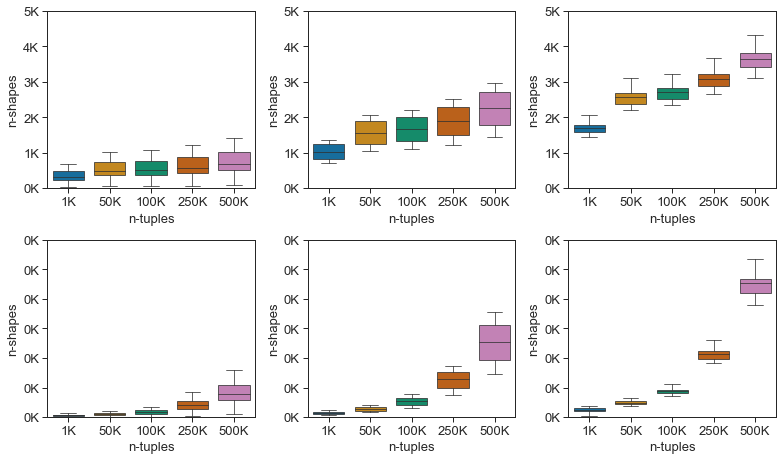

In [9]:
def setup_boxplot(ax, data, x, y, xlabel, ylabel, width, linewidth, ylim, dpi=600, yticklabels_suffix='K', fontsize=18):
    sns.boxplot(ax=ax, data=data, x=x, y=y, width=width, linewidth=linewidth, showfliers=False)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_ylim(ylim)
    
    # Set custom y-tick labels with specified suffix and adjust font size
    ylabels = ['{:,.0f}'.format(y) + yticklabels_suffix for y in ax.get_yticks()/1000]
    ax.set_yticklabels(ylabels, fontsize=fontsize)
    
    # Optionally, adjust x-tick labels font size if needed
    for label in ax.get_xticklabels():
        label.set_fontsize(fontsize)

# Setup the figure layout
fig, axs = plt.subplots(2, 3, figsize=(11, 6.5))  # Adjusted for 3 plots per row
plt.subplots_adjust(left=0.3, bottom=0.35, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Define the parameters for each plot
plot_params = [
    (dp1, 'n_shapes', (0, 5000)),
    (dp2, 'n_shapes', (0, 5000)),
    (dp3, 'n_shapes', (0, 5000)),
    (dp1, 't_shapes_q_sec', (0, 120)),
    (dp2, 't_shapes_q_sec', (0, 120)),
    (dp3, 't_shapes_q_sec', (0, 120))
]

# Plot each figure
for ax, (data, y, ylim) in zip(axs.flat, plot_params):
    setup_boxplot(ax, data, 'db', y, 'n-tuples', 'n-shapes', lwi, wid, ylim, fontsize=13)

plt.tight_layout()
plt.show()

The code section below corresponds to a figure in our paper, demonstrating that the size of the database (measured by the number of tuples, n_tuples) does not significantly affect the time required for constructing the dependency graph and performing termination checks (t_graph + t_comp). This observation supports our argument that the algorithm's runtime can be effectively analyzed by separating it into two components: the time to identify shapes and the time for graph construction and special fully connected components analysis.

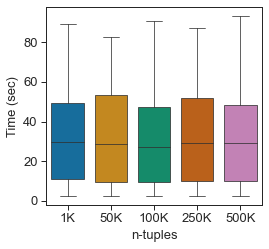

In [10]:
def plot_and_save_boxplot(data, x, y, xlabel, ylabel, width, linewidth, figsize=(6, 6), dpi=600, showfliers=False, ylim=None, fontsize=18):
    plt.figure(figsize=figsize)
    ax = sns.boxplot(data=data, x=x, y=y, width=width, linewidth=linewidth, showfliers=showfliers)
    
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)  # Set font size for tick labels
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    plt.subplots_adjust(left=0.3, bottom=0.35, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    plt.show()

# Assuming 'dm', 'lwi', 'wid' are predefined along with their respective values
plot_and_save_boxplot(
    data=dm, 
    x='db', 
    y='t_graph_component_sec', 
    xlabel='n-tuples', 
    ylabel='Time (sec)', 
    width=lwi, 
    linewidth=wid, 
    figsize=(5, 5),  # Adjusted figure size
    fontsize=13  # Specify font size here
)


The concluding section of this demonstration focuses on evaluating the algorithm's performance in checking chase termination for linear rules. It presents figures that detail how the number of rules (n_rules) influences various time metrics, including rule parsing (t_parse), dependency graph construction (t_graph), and identification of special fully connected components (t_comp). "Total" here denotes the aggregate time for termination checking, exclusive of shape identification time previously discussed.

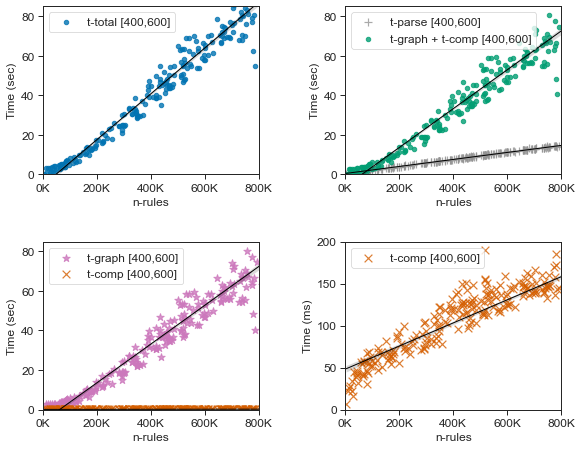

In [11]:
d = pd.read_csv("linear.csv")
c_palette = sns.color_palette("colorblind")
d['t_graph_component'] = d['t_graph'] + d['t_component']
d['t_graph_component_sec'] = d['t_graph_component'] /1000
d['t_graph_sec'] = d['t_graph'] /1000
d['t_component_sec'] = d['t_component'] /1000
d['nodes_edges_d'] = d['n_edges_d'] + d['n_nodes_d']
d['n_rules_round'] = np.floor(d['n_rules']/100000) * 100000
d['t_parse_sec'] = d['t_parse']/1000
d['t_total_sec'] = d['t_graph_component_sec'] + d['t_parse_sec']
d = d.loc[d["arity_profile"] == "[1-5]"]
d1 = d.loc[d["predicate_profile"] == " [5-200)"]
d2 = d.loc[d["predicate_profile"] == " [200-400)"]
d3 = d.loc[d["predicate_profile"] == " [400-600]"]

import matplotlib.pyplot as plt
import seaborn as sns

def plot_subplot(ax, data, x, y, scatter_kws, line_kws, label, marker, xlim, ylim, xlabel, ylabel, fontsize=14,
                 extra_y=None, extra_scatter_kws=None, extra_line_kws=None, extra_label=None, extra_marker=None, dpi=600):
    sns.regplot(ax=ax, data=data, x=x, y=y,
                scatter_kws=scatter_kws, line_kws=line_kws, marker=marker, label=label)
    if extra_y is not None:
        sns.regplot(ax=ax, data=data, x=x, y=extra_y,
                    scatter_kws=extra_scatter_kws, line_kws=extra_line_kws, marker=extra_marker, label=extra_label)

    ax.legend(fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)  # Ensure x-ticks are set to include all desired points
    xlabels = ['{:,.0f}'.format(x) + 'K' for x in xticks/1000]
    ax.set_xticklabels(xlabels, rotation=0, fontsize=fontsize)

# Setup the figure layout for a 2x2 grid with increased figure size
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fontsize = 12# Adjust the font size as needed

# Assuming variables like 'd3', 'palette', 'black', 'thickLine', 'mtsize', 'msize' are predefined
# Update calls to the function for each subplot, adjusting for your dataset and preferences
plot_subplot(axs[0, 0], d3, 'n_rules', 't_total_sec', 
             {"s": mtsize*2, "color": palette[0]}, {"color": black, "lw": thickLine}, 
             't-total [400,600]', 'o', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize)

plot_subplot(axs[0, 1], d3, 'n_rules', 't_parse_sec', 
             {"s": msize*2, "color": palette[7]}, {"color": black, "lw": thickLine}, 
             't-parse [400,600]', '+', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize,
             extra_y='t_graph_component_sec', extra_scatter_kws={"s": mtsize*2, "color": palette[2]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-graph + t-comp [400,600]', extra_marker='o')

plot_subplot(axs[1, 0], d3, 'n_rules', 't_graph_sec', 
             {"s": msize*2, "color": palette[4]}, {"color": black, "lw": thickLine}, 
             't-graph [400,600]', '*', (0, 800000), (0, 85), 'n-rules', 'Time (sec)', fontsize=fontsize,
             extra_y='t_component_sec', extra_scatter_kws={"s": msize*2, "color": palette[3]}, 
             extra_line_kws={"color": black, "lw": thickLine}, extra_label='t-comp [400,600]', extra_marker='x')

plot_subplot(axs[1, 1], d3, 'n_rules', 't_component', 
             {"s": msize*2, "color": palette[3]}, {"color": black, "lw": thickLine}, 
             't-comp [400,600]', 'x', (0, 800000), (0, 200), 'n-rules', 'Time (ms)', fontsize=fontsize)

plt.show()